In [5]:
import numpy as np

# Path to the .npz file
file_path = '/content/drive/MyDrive/Dataset-New/data_label.npz'

# Load the .npz file
data = np.load(file_path)

# Access the image data and labels
load_data = data['data']
load_label = data['label']

# Display the shapes of the loaded arrays
print(f"Data shape: {load_data.shape}")
print(f"Label shape: {load_label.shape}")

Data shape: (4000, 256, 256, 3)
Label shape: (4000,)


In [6]:
from sklearn.utils import shuffle

# Split the dataset
train_data = np.concatenate((load_data[:1600], load_data[2000:3600]), axis=0)  # 1st 1600 from label 1 and next 1600 from label 0
train_label = np.concatenate((load_label[:1600], load_label[2000:3600]), axis=0)

test_data = np.concatenate((load_data[1600:2000], load_data[3600:4000]), axis=0)  # 400 from label 1 and 400 from label 0
test_label = np.concatenate((load_label[1600:2000], load_label[3600:4000]), axis=0)

# Shuffle the training data and labels
train_data, train_label = shuffle(train_data, train_label, random_state=42)

# Shuffle the test data and labels
test_data, test_label = shuffle(test_data, test_label, random_state=42)

# Display the shapes to confirm
print(f"Train data shape: {train_data.shape}")
print(f"Train label shape: {train_label.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Test label shape: {test_label.shape}")

Train data shape: (3200, 256, 256, 3)
Train label shape: (3200,)
Test data shape: (800, 256, 256, 3)
Test label shape: (800,)


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential([
    Input(shape = (256, 256, 3)),
    Conv2D(32,3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 1)                 2

In [ ]:
model.compile (optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [ ]:
# Fit the model
history = model.fit(
    train_data,        # Training data
    train_label,       # Training labels
    validation_data=(test_data, test_label),  # Use test data as validation data
    epochs=10,         # Number of epochs
    batch_size=32,     # Batch size
    verbose=1          # Display progress
)

Epoch 1/10
100/100 [==============================] - 223s 2s/step - loss: 0.7215 - accuracy: 0.5791 - val_loss: 0.6123 - val_accuracy: 0.6800
Epoch 2/10
100/100 [==============================] - 217s 2s/step - loss: 0.5684 - accuracy: 0.6975 - val_loss: 0.5271 - val_accuracy: 0.7375
Epoch 3/10
100/100 [==============================] - 217s 2s/step - loss: 0.4549 - accuracy: 0.7881 - val_loss: 0.5134 - val_accuracy: 0.7550
Epoch 4/10
100/100 [==============================] - 216s 2s/step - loss: 0.3490 - accuracy: 0.8478 - val_loss: 0.5364 - val_accuracy: 0.7225
Epoch 5/10
100/100 [==============================] - 217s 2s/step - loss: 0.2629 - accuracy: 0.8906 - val_loss: 0.5491 - val_accuracy: 0.7613
Epoch 6/10
100/100 [==============================] - 217s 2s/step - loss: 0.1722 - accuracy: 0.9344 - val_loss: 0.5917 - val_accuracy: 0.7688
Epoch 7/10
100/100 [==============================] - 216s 2s/step - loss: 0.1111 - accuracy: 0.9641 - val_loss: 0.6761 - val_accuracy: 0.7550

In [8]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss from the model history.

    Args:
        history: History object returned by the model.fit() method.
    """
    # Extract metrics
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(accuracy) + 1)

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


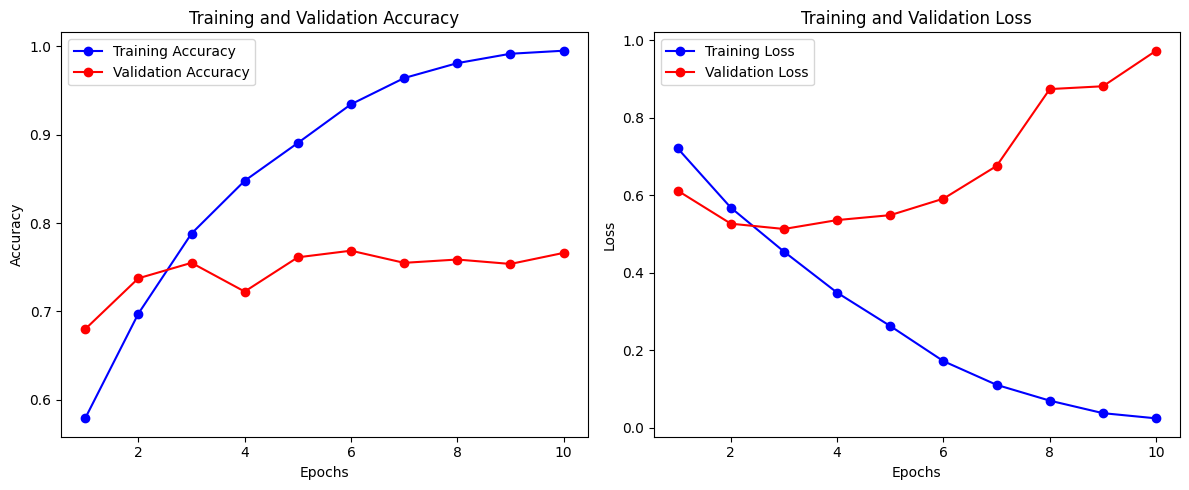

In [ ]:
plot_training_history(history)

Our model is overfiting so we have to decrese the number of prams

First we have to save this model

In [ ]:
# Path to save the Keras SavedModel format
keras_model_path = '/content/drive/MyDrive/saved_model/model_1_x.keras'

# Path to save the HDF5 format
h5_model_path = '/content/drive/MyDrive/saved_model/h5_model/model_1_x.h5'

# Save the model in the Keras native format
model.save(keras_model_path, save_format='keras')
print(f"Model saved in Keras native format")

# Save the model in HDF5 format
model.save(h5_model_path, save_format='h5')
print(f"Model saved in HDF5 format at: {h5_model_path}")


Model saved in Keras native format
Model saved in HDF5 format at: /content/drive/MyDrive/saved_model/h5_model/model_1_x.h5


In [ ]:
model_2 = Sequential([
    Input(shape = (256, 256, 3)),
    Conv2D(32,3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3, activation='relu'),
    MaxPooling2D(),
    Conv2D(96,3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 60, 60, 96)        55392     
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 30, 30, 96)      

In [ ]:
model_2.compile (optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [ ]:
# Fit the model
history_2 = model_2.fit(
    train_data,        # Training data
    train_label,       # Training labels
    validation_data=(test_data, test_label),  # Use test data as validation data
    epochs=10,         # Number of epochs
    batch_size=32,     # Batch size
    verbose=1          # Display progress
)

Epoch 1/10
100/100 [==============================] - 264s 3s/step - loss: 0.6509 - accuracy: 0.6103 - val_loss: 0.5912 - val_accuracy: 0.6775
Epoch 2/10
100/100 [==============================] - 259s 3s/step - loss: 0.5552 - accuracy: 0.7053 - val_loss: 0.5345 - val_accuracy: 0.7375
Epoch 3/10
100/100 [==============================] - 259s 3s/step - loss: 0.4811 - accuracy: 0.7672 - val_loss: 0.5034 - val_accuracy: 0.7425
Epoch 4/10
100/100 [==============================] - 258s 3s/step - loss: 0.4240 - accuracy: 0.8091 - val_loss: 0.4469 - val_accuracy: 0.7800
Epoch 5/10
100/100 [==============================] - 259s 3s/step - loss: 0.3607 - accuracy: 0.8400 - val_loss: 0.5273 - val_accuracy: 0.7275
Epoch 6/10
100/100 [==============================] - 259s 3s/step - loss: 0.3108 - accuracy: 0.8687 - val_loss: 0.5068 - val_accuracy: 0.7650
Epoch 7/10
100/100 [==============================] - 259s 3s/step - loss: 0.2703 - accuracy: 0.8831 - val_loss: 0.5013 - val_accuracy: 0.7825

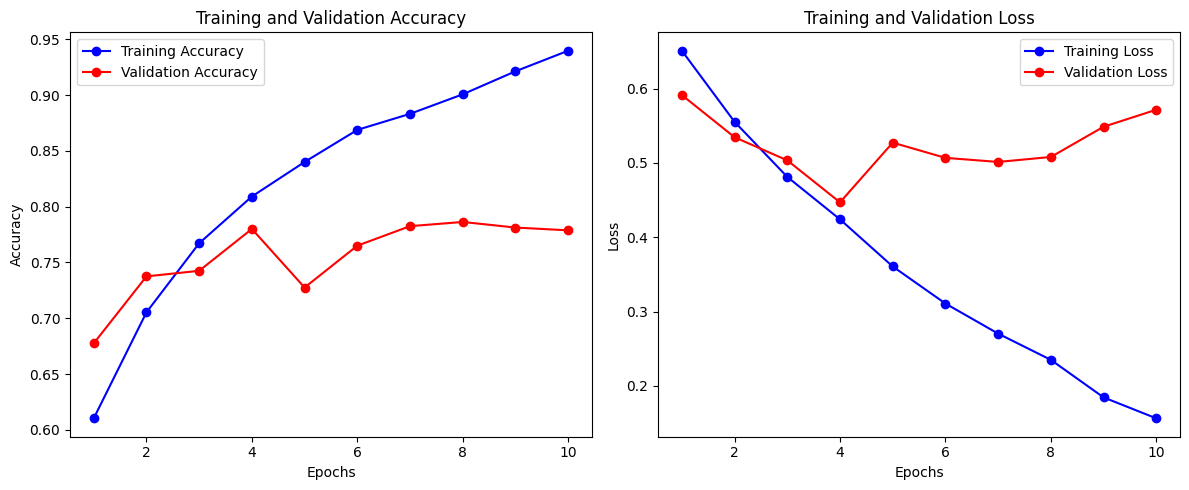

In [ ]:
plot_training_history(history_2)

model_2 is better than model_1 but still overfit

In [ ]:
predictions = model_2.predict(test_data)
predicted_labels = (predictions > 0.5).astype(int)

25/25 [==============================] - 18s 700ms/step


In [ ]:
loss, accuracy = model_2.evaluate(test_data, test_label, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.5715
Test Accuracy: 0.7788


25/25 [==============================] - 18s 700ms/step


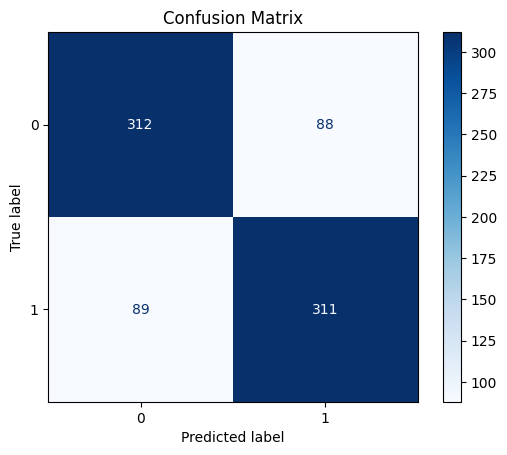

Confusion Matrix:
[[312  88]
 [ 89 311]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Perform predictions on the test data
predictions = model_2.predict(test_data)

# Convert probabilities to class labels
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Create the confusion matrix
cm = confusion_matrix(test_label, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Print the confusion matrix values
print("Confusion Matrix:")
print(cm)


In [ ]:
# Path to save the Keras SavedModel format
keras_model_path = '/content/drive/MyDrive/saved_model/keras_model/model_2_x.keras'

# Path to save the HDF5 format
h5_model_path = '/content/drive/MyDrive/saved_model/h5_model/model_2_x.h5'

# Save the model in the Keras native format
model_2.save(keras_model_path, save_format='keras')
print(f"Model saved in Keras native format")

# Save the model in HDF5 format
model_2.save(h5_model_path, save_format='h5')
print(f"Model saved in HDF5 format at: {h5_model_path}")


Model saved in Keras native format
Model saved in HDF5 format at: /content/drive/MyDrive/saved_model/h5_model/model_2_x.h5


In [ ]:
model_3 = Sequential([
    Input(shape = (256, 256, 3)),
    Conv2D(64,3, activation='relu'),
    MaxPooling2D(),
    Conv2D(48,3, activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model_3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 127, 127, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_55 (Conv2D)          (None, 125, 125, 48)      27696     
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 62, 62, 48)        0         
 ng2D)                                                           
                                                                 
 conv2d_56 (Conv2D)          (None, 60, 60, 32)        13856     
                                                                 
 max_pooling2d_56 (MaxPooli  (None, 30, 30, 32)      

In [ ]:
model_3.compile (optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [ ]:
# Fit the model
history_3 = model_3.fit(
    train_data,        # Training data
    train_label,       # Training labels
    validation_data=(test_data, test_label),  # Use test data as validation data
    epochs=10,         # Number of epochs
    batch_size=32,     # Batch size
    verbose=1          # Display progress
)

Epoch 1/10
100/100 [==============================] - 390s 4s/step - loss: 0.6642 - accuracy: 0.5872 - val_loss: 0.5909 - val_accuracy: 0.6825
Epoch 2/10
100/100 [==============================] - 385s 4s/step - loss: 0.5772 - accuracy: 0.7016 - val_loss: 0.6144 - val_accuracy: 0.6450
Epoch 3/10
100/100 [==============================] - 383s 4s/step - loss: 0.5070 - accuracy: 0.7481 - val_loss: 0.4718 - val_accuracy: 0.7788
Epoch 4/10
100/100 [==============================] - 384s 4s/step - loss: 0.4496 - accuracy: 0.7856 - val_loss: 0.4794 - val_accuracy: 0.7812
Epoch 5/10
100/100 [==============================] - 384s 4s/step - loss: 0.4118 - accuracy: 0.8147 - val_loss: 0.4826 - val_accuracy: 0.7713
Epoch 6/10
100/100 [==============================] - 383s 4s/step - loss: 0.3678 - accuracy: 0.8291 - val_loss: 0.4696 - val_accuracy: 0.7850
Epoch 7/10
100/100 [==============================] - 385s 4s/step - loss: 0.3267 - accuracy: 0.8600 - val_loss: 0.4970 - val_accuracy: 0.7775

In [ ]:
loss, accuracy = model_3.evaluate(test_data, test_label, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.5342
Test Accuracy: 0.7625


In [ ]:
# Path to save the Keras SavedModel format
keras_model_path = '/content/drive/MyDrive/saved_model/keras_model/model_3_x.keras'

# Path to save the HDF5 format
h5_model_path = '/content/drive/MyDrive/saved_model/h5_model/model_3_x.h5'

# Save the model in the Keras native format
model_3.save(keras_model_path, save_format='keras')
print(f"Model saved in Keras native format")

# Save the model in HDF5 format
model_3.save(h5_model_path, save_format='h5')
print(f"Model saved in HDF5 format at: {h5_model_path}")


Model saved in Keras native format
Model saved in HDF5 format at: /content/drive/MyDrive/saved_model/h5_model/model_3_x.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 26s 1s/step


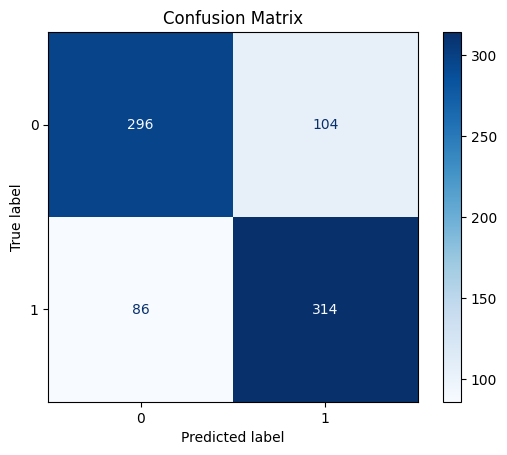

Confusion Matrix:
[[296 104]
 [ 86 314]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Perform predictions on the test data
predictions = model_3.predict(test_data)

# Convert probabilities to class labels
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Create the confusion matrix
cm = confusion_matrix(test_label, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Print the confusion matrix values
print("Confusion Matrix:")
print(cm)


In [9]:
model_4 = Sequential([
    Input(shape = (256, 256, 3)),
    Conv2D(16,3, activation='relu'),
    MaxPooling2D(),
    Conv2D(32,3, activation='relu'),
    MaxPooling2D(),
    Conv2D(48,3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])

In [10]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 48)        13872     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 48)        0

In [11]:
model_4.compile (optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [12]:
# Fit the model
history_4 = model_4.fit(
    train_data,        # Training data
    train_label,       # Training labels
    validation_data=(test_data, test_label),  # Use test data as validation data
    epochs=10,         # Number of epochs
    batch_size=32,     # Batch size
    verbose=1          # Display progress
)

Epoch 1/10
100/100 [==============================] - 136s 1s/step - loss: 0.6648 - accuracy: 0.5878 - val_loss: 0.6099 - val_accuracy: 0.6925
Epoch 2/10
100/100 [==============================] - 128s 1s/step - loss: 0.5599 - accuracy: 0.7150 - val_loss: 0.5206 - val_accuracy: 0.7250
Epoch 3/10
100/100 [==============================] - 127s 1s/step - loss: 0.4948 - accuracy: 0.7597 - val_loss: 0.4665 - val_accuracy: 0.7713
Epoch 4/10
100/100 [==============================] - 126s 1s/step - loss: 0.4649 - accuracy: 0.7816 - val_loss: 0.4612 - val_accuracy: 0.7812
Epoch 5/10
100/100 [==============================] - 127s 1s/step - loss: 0.4295 - accuracy: 0.8019 - val_loss: 0.4344 - val_accuracy: 0.7962
Epoch 6/10
100/100 [==============================] - 127s 1s/step - loss: 0.3963 - accuracy: 0.8216 - val_loss: 0.4502 - val_accuracy: 0.7850
Epoch 7/10
100/100 [==============================] - 127s 1s/step - loss: 0.3739 - accuracy: 0.8322 - val_loss: 0.4132 - val_accuracy: 0.8150

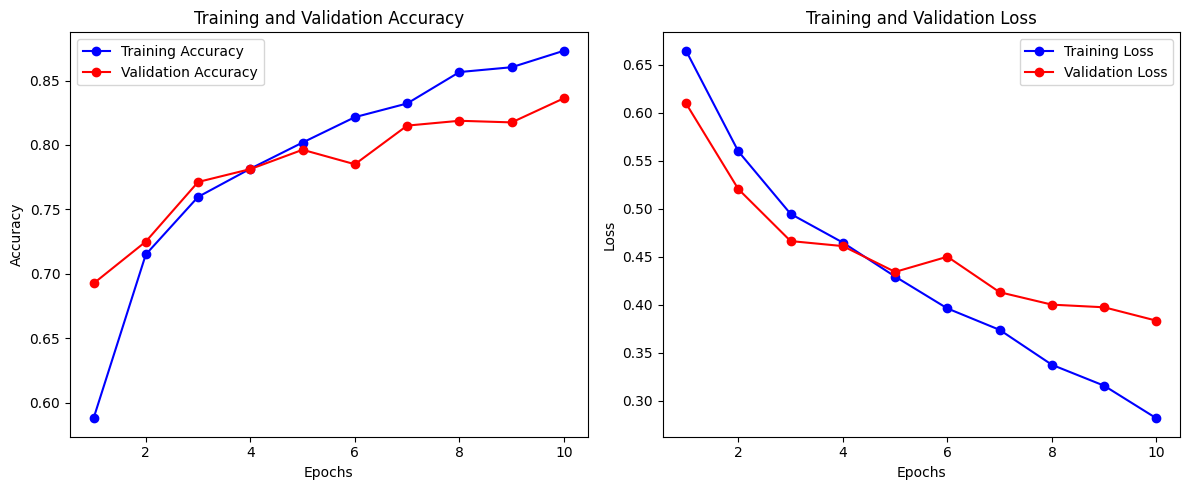

In [17]:
plot_training_history(history_4)

This model have almost perfect accuracy and validation accuracy and loss curves

In [13]:
loss, accuracy = model_4.evaluate(test_data, test_label, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.3835
Test Accuracy: 0.8363


25/25 [==============================] - 9s 334ms/step


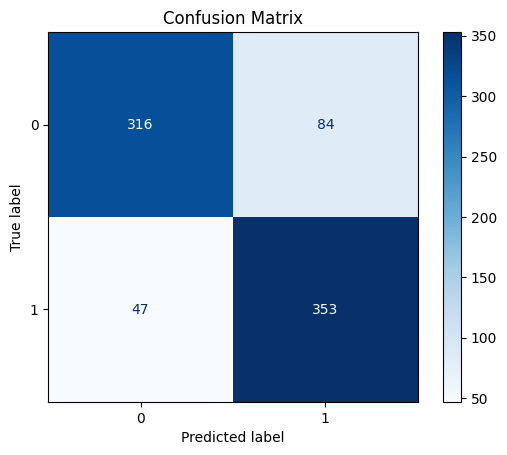

Confusion Matrix:
[[316  84]
 [ 47 353]]


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Perform predictions on the test data
predictions = model_4.predict(test_data)

# Convert probabilities to class labels
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Create the confusion matrix
cm = confusion_matrix(test_label, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Print the confusion matrix values
print("Confusion Matrix:")
print(cm)


In [16]:
# Path to save the Keras SavedModel format
keras_model_path = '/content/drive/MyDrive/saved_model/keras_model/model_4_x.keras'

# Path to save the HDF5 format
h5_model_path = '/content/drive/MyDrive/saved_model/h5_model/model_4_x.h5'

# Save the model in the Keras native format
model_4.save(keras_model_path, save_format='keras')
print(f"Model saved in Keras native format")

# Save the model in HDF5 format
model_4.save(h5_model_path, save_format='h5')
print(f"Model saved in HDF5 format at: {h5_model_path}")


Model saved in Keras native format
Model saved in HDF5 format at: /content/drive/MyDrive/saved_model/h5_model/model_4_x.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Now model_4 have the best accuracy score on training and test set.